In [1]:
# Nonlinear Dimensionality Reduction (Manifold learning)

In [2]:
%matplotlib inline

In [3]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn import preprocessing

In [4]:
sns.set(style='white')

In [5]:
d1 = pd.read_csv('data/data1.csv', sep=';', header=None)

n = 13  # number of inputs
input_indices = list(range(n))
samples = 5000 # number of samples from whole dataset

y = d1[n]
d1 = pd.DataFrame(preprocessing.scale(d1[input_indices])) # normalization across whole dataset
d1[n] = y

d1_subset = d1.sample(samples) # sample smaller subset
print('rows, columns:', d1_subset.shape)
d1_subset.head()

rows, columns: (5000, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
43989,-1.536627,0.844389,0.036057,1.152094,0.201076,-2.080603,0.232315,-0.513729,0.129263,0.371245,-1.320561,0.803825,0.775226,0.2667
22745,0.603638,-0.847909,-0.812419,0.186398,-1.059201,0.260269,-1.762505,-0.743200,0.247137,-0.967589,-0.681680,-1.526876,-1.024433,3.9510
6683,-1.186324,1.274827,0.180074,-1.564133,-0.472996,0.979516,0.285804,0.986541,-1.724930,-1.101070,0.331621,0.635404,0.157748,1.3445
44047,-1.523811,0.831799,0.045431,1.156389,0.235559,-2.082295,0.241689,-0.509375,0.104068,0.375561,-1.316138,0.833822,0.782994,0.2619
11409,1.037862,1.198811,-1.570565,-1.532558,-1.316928,1.891077,0.866191,-1.357922,-1.792115,-1.195715,1.425809,0.590096,0.304550,3.1291


In [6]:
x = d1_subset[input_indices]
# x = pd.DataFrame(preprocessing.scale(x)) # normalization across subset
x.index = d1_subset.index
y = d1_subset[n]

In [7]:
print(y.describe())

count    5000.000000
mean        5.046650
std        38.785595
min         0.079800
25%         0.872700
50%         2.314500
75%         4.246925
max      2231.930000
Name: 13, dtype: float64


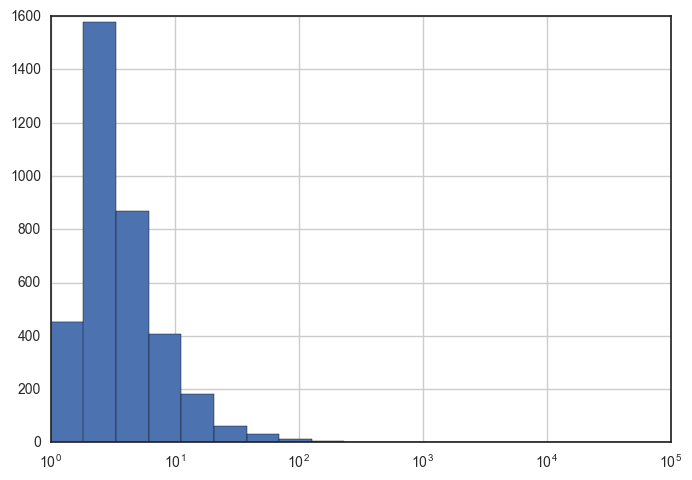

In [8]:
y.hist(bins=np.logspace(0, 5, 20))
plt.gca().set_xscale('log')

[(-5.7934673439520701, 5.1438708219956819),

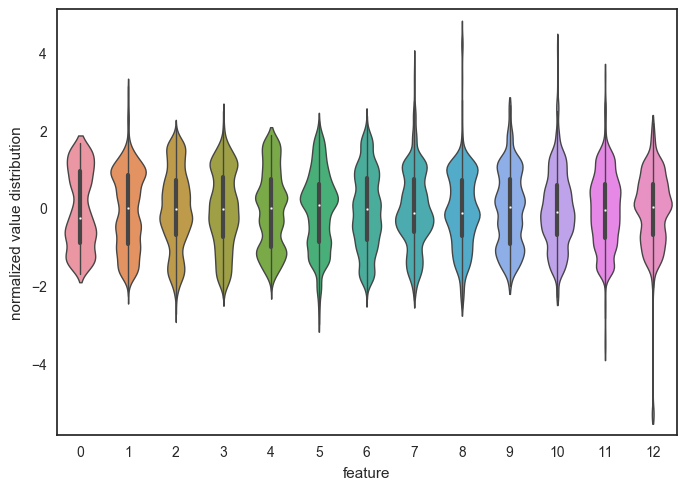

In [9]:
grid = sns.violinplot(data=x, bw=.2, cut=1, linewidth=1)
grid.set(ylim=(min(x.min())-0.5, max(x.max())+0.5), xlabel='feature', ylabel='normalized value distribution')

## Isomap

In [10]:
isomap = Isomap(n_components=2, eigen_solver='dense', n_jobs=-1)
x_reduced_isomap = pd.DataFrame(isomap.fit_transform(x))

In [11]:
print('rows, columns:', x_reduced_isomap.shape)
x_reduced_isomap.head()

rows, columns: (5000, 2)


,0,1
0,-0.022344,-0.025174
1,-0.022465,-0.025394
2,-0.021991,-0.024531
3,-0.022345,-0.025177
4,-0.022523,-0.025501


In [12]:
x_reduced_isomap.index = x.index
d_isomap = pd.concat([x_reduced_isomap, y], axis=1)
d_isomap.columns = ['x1', 'x2', 'y']
d_isomap.head()

,x1,x2,y
43989,-0.022344,-0.025174,0.2667
22745,-0.022465,-0.025394,3.9510
6683,-0.021991,-0.024531,1.3445
44047,-0.022345,-0.025177,0.2619
11409,-0.022523,-0.025501,3.1291


## Scatter Plot

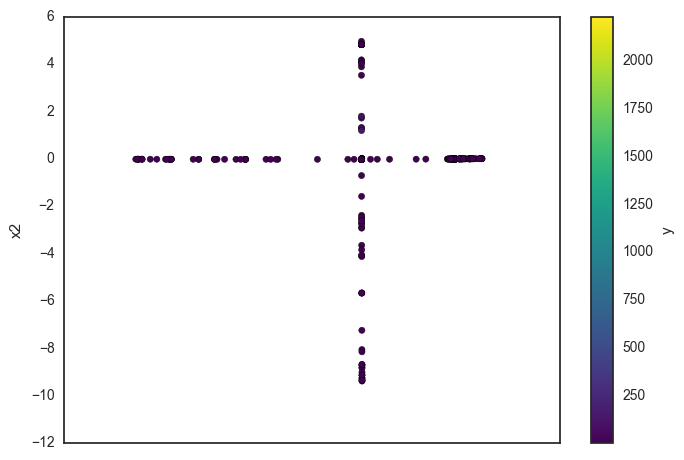

In [13]:
d_isomap.plot.scatter(x='x1', y='x2', c='y', cmap='viridis');

## Hexbin Plot

<function __main__.plot_hexbin>

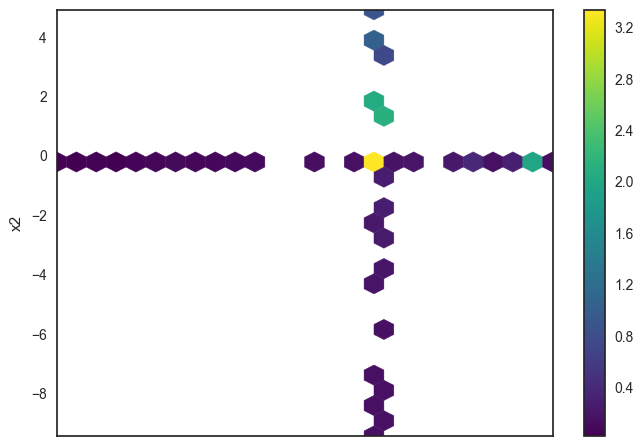

In [14]:
def plot_hexbin(gridsize, logscale, maximum):
    d_isomap.plot.hexbin(x='x1', y='x2', C='y',
                         bins='log' if logscale else None,
                         gridsize=gridsize,
                         reduce_C_function=np.max if maximum else np.mean,
                         cmap='viridis')

gridsize = widgets.IntSlider(min=10, max=100, step=5, value=25, description='grid size')
widgets.interact(plot_hexbin, gridsize=gridsize, logscale=True, maximum=True)
# assumes we are intersted in maximization

## t-SNE

In [15]:
tsne = TSNE(n_components=2)
x_reduced_tsne = pd.DataFrame(tsne.fit_transform(x))

In [16]:
print('rows, columns:', x_reduced_tsne.shape)
x_reduced_tsne.head()

rows, columns: (5000, 2)


,0,1
0,6.895209,3.128836
1,2.144460,-14.824444
2,10.200967,3.689312
3,6.897978,3.133259
4,-15.737058,6.774985


In [17]:
x_reduced_tsne.index = x.index
d_tsne = pd.concat([x_reduced_tsne, y], axis=1)
d_tsne.columns = ['x1', 'x2', 'y']
d_tsne.head()

,x1,x2,y
43989,6.895209,3.128836,0.2667
22745,2.144460,-14.824444,3.9510
6683,10.200967,3.689312,1.3445
44047,6.897978,3.133259,0.2619
11409,-15.737058,6.774985,3.1291


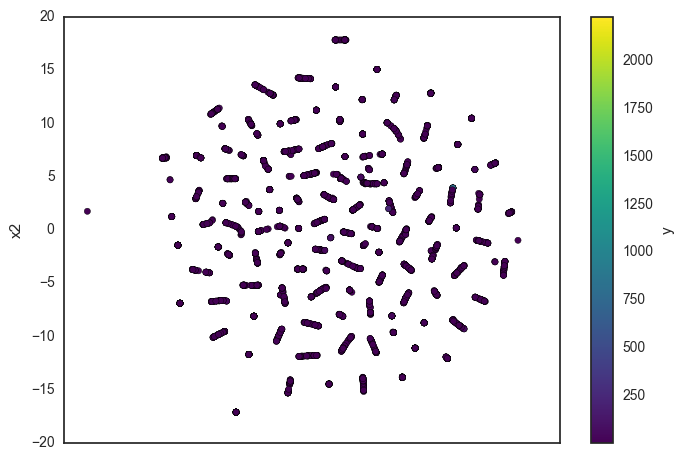

In [18]:
d_tsne.plot.scatter(x='x1', y='x2', c='y', cmap='viridis');

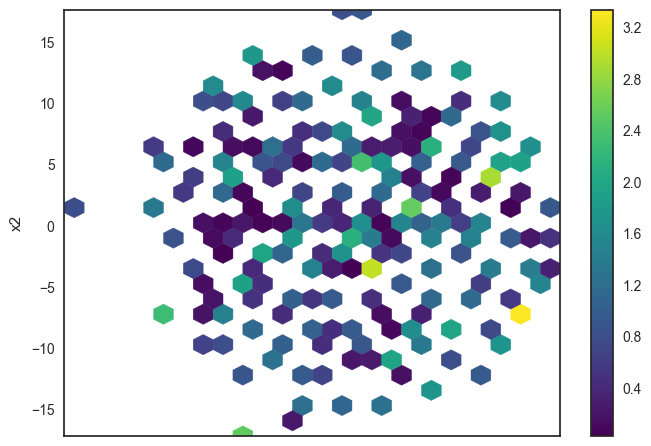

In [19]:
def plot_hexbin(gridsize, logscale, maximum):
    d_tsne.plot.hexbin(x='x1', y='x2', C='y',
                       bins='log' if logscale else None,
                       gridsize=gridsize,
                       reduce_C_function=np.max if maximum else np.mean,
                       cmap='viridis')

gridsize = widgets.IntSlider(min=10, max=100, step=5, value=25, description='grid size')
widgets.interact(plot_hexbin, gridsize=gridsize, logscale=True, maximum=True)
# assumes we are intersted in maximization